In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=470b5eca8552f92a39f474ee9cc263daa2fc89e6401c71868333b37e3aa73794
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


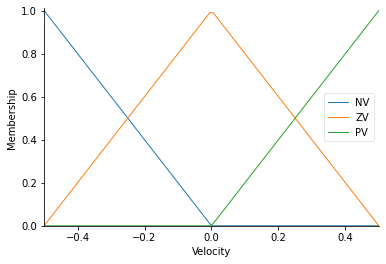

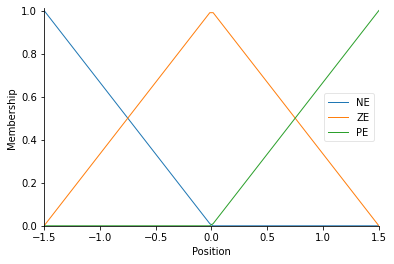

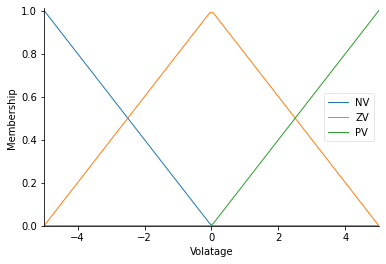

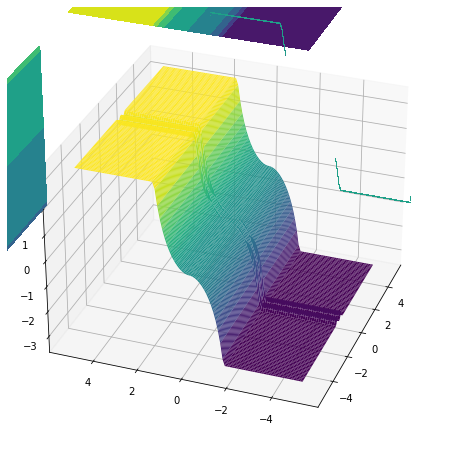

In [7]:
from networkx.algorithms.bipartite import projection
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

universe_velocity = np.linspace(-0.5,0.5,100)
universe_position = np.linspace(-1.5,1.5,100)
universe_volatage = np.linspace(-5,5,100)

velocity = ctrl.Antecedent(universe_velocity,'Velocity')
position = ctrl.Antecedent(universe_position,'Position')
volatage = ctrl.Consequent(universe_volatage,'Volatage')

name_velocity = ['NV','ZV','PV']
name_position = ['NE','ZE','PE']
name_volatage = ['NV','ZV','PV']
velocity.automf(names=name_velocity)
position.automf(names=name_position)
volatage.automf(names=name_volatage)

velocity.view()
position.view()
volatage.view()

rule1 = ctrl.Rule(antecedent=position['NE']&(velocity['NV']|velocity['ZV']|velocity['PV']),consequent=volatage['NV'])
rule2 = ctrl.Rule(antecedent=position['ZE']&(velocity['NV']|velocity['ZV']|velocity['PV']),consequent=volatage['ZV'])
rule3 = ctrl.Rule(antecedent=position['PE']&(velocity['NV']|velocity['ZV']|velocity['PV']),consequent=volatage['PV'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
sim = ctrl.ControlSystemSimulation(computing_ctrl,flush_after_run=100*100+1)
upsampled = np.linspace(-5,5,100)
x,y = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range(100):
  for j in range(100):
    sim.input['Velocity'] = x[i,j]
    sim.input['Position'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Volatage']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride = 1,cstride = 1,cmap = 'viridis',linewidth = 0.4,antialiased = True)
cset = ax.contourf(x,y,z,zdir='z',offset = 9,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='x',offset = 11,cmap = 'viridis')
cset = ax.contourf(x,y,z,zdir='y',offset = 11,cmap = 'viridis')
ax.view_init(30,200)